Project: Predicting Income Using the Adult Census Dataset
The goal of this project is to analyze factors influencing income levels and build a predictive model to classify individuals earning >50K 
or <=50K per year based on demographic and employment-related features.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("adult.csv")

# Display basic information
print(df.info())
print(df.head())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
   age  workclass  fnlwgt     education  educational-num      marital-s

In [4]:
# Data contains categorical and numerical features.Some Columns have missing values.

In [5]:
# Handling missing value
#Fill missing values in categorical features with "Unknown"
df.fillna("Unknown", inplace=True)

In [6]:
#Encoding Categorical Features
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display encoded dataset
df_encoded.head()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,226802,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,38,89814,9,0,0,50,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,44,160323,10,7688,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,18,103497,10,0,0,30,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


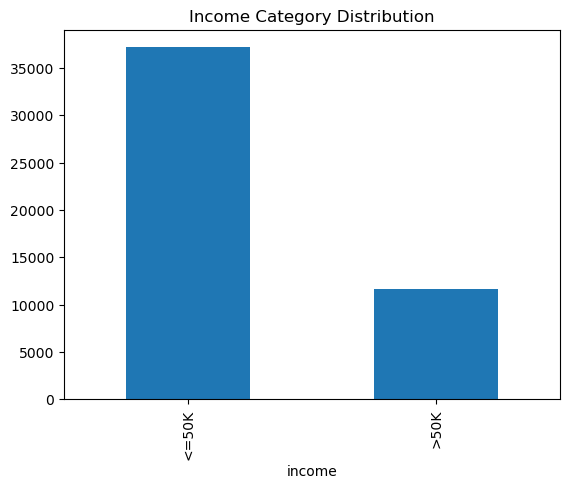

In [7]:
# Exploratory Data Analysis
# Count income categories
df['income'].value_counts().plot(kind="bar", title="Income Category Distribution")
plt.show()

In [8]:
# Most individualsearn greater than 50k(class imbalance exists)

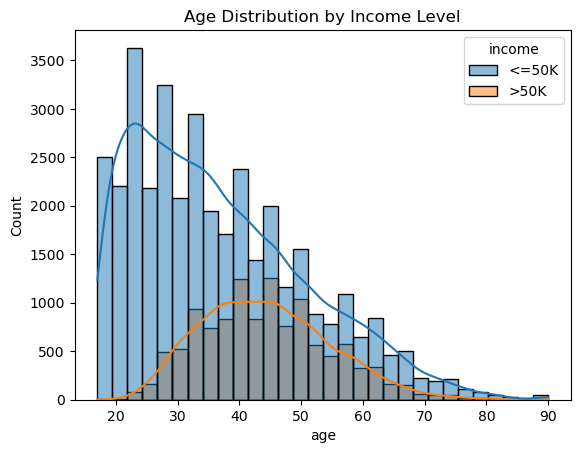

In [9]:
sns.histplot(df, x="age", hue="income", kde=True, bins=30)
plt.title("Age Distribution by Income Level")
plt.show()

In [10]:
# older individuals tend to have higher income

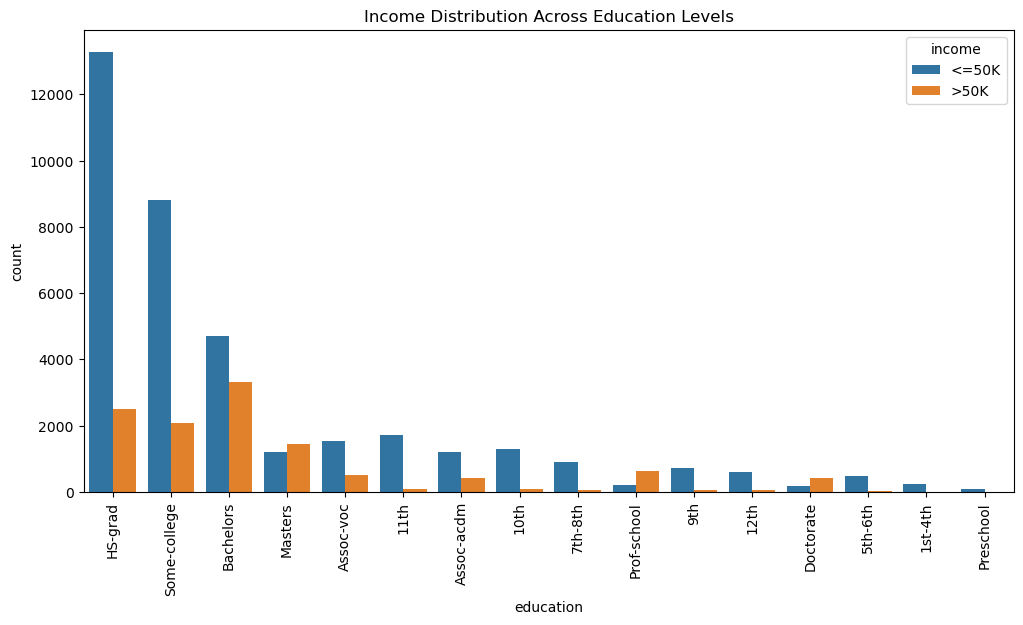

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="education", hue="income", order=df["education"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Income Distribution Across Education Levels")
plt.show()

Higher education levels correlate with higher income

C:\Users\asraf\AppData\Local\Temp\ipykernel_17996\2883662523.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="income", y="hours-per-week", estimator=np.mean, ci=None, palette="viridis")
C:\Users\asraf\AppData\Local\Temp\ipykernel_17996\2883662523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="income", y="hours-per-week", estimator=np.mean, ci=None, palette="viridis")


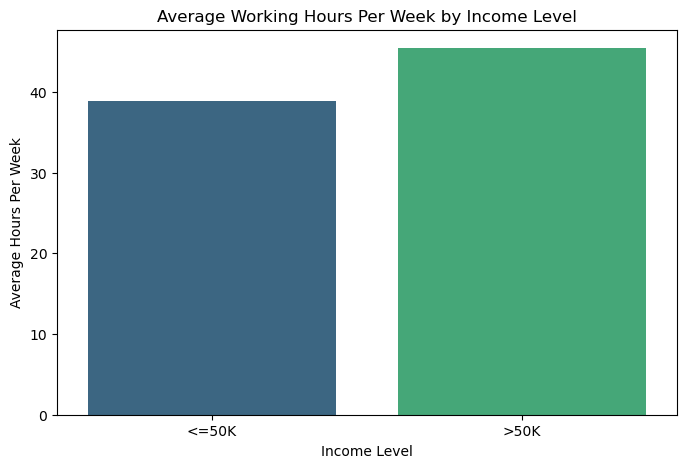

In [22]:
# Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="income", y="hours-per-week", estimator=np.mean, ci=None, palette="viridis")

# Add labels and title
plt.xlabel("Income Level")
plt.ylabel("Average Hours Per Week")
plt.title("Average Working Hours Per Week by Income Level")
plt.show()

Higher income individuals tend to work more hourse per week

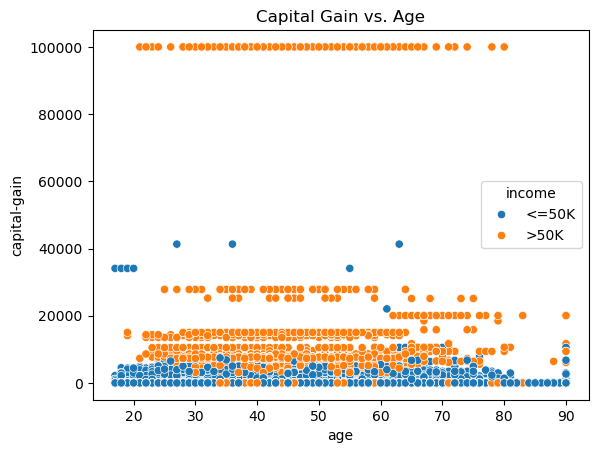

In [23]:
sns.scatterplot(data=df, x="age", y="capital-gain", hue="income")
plt.title("Capital Gain vs. Age")
plt.show()

Higher Capital Gain is observed among older individuals

                                     age    fnlwgt  educational-num  \
age                             1.000000 -0.076628         0.030940   
fnlwgt                         -0.076628  1.000000        -0.038761   
educational-num                 0.030940 -0.038761         1.000000   
capital-gain                    0.077229 -0.003706         0.125146   
capital-loss                    0.056944 -0.004366         0.080972   
...                                  ...       ...              ...   
native-country_Trinadad&Tobago  0.001056  0.004153        -0.010201   
native-country_United-States    0.011888 -0.070645         0.104210   
native-country_Vietnam         -0.012337 -0.007479        -0.007544   
native-country_Yugoslavia       0.002905  0.004699        -0.005798   
income_>50K                     0.230369 -0.006339         0.332613   

                                capital-gain  capital-loss  hours-per-week  \
age                                 0.077229      0.056944        0.0

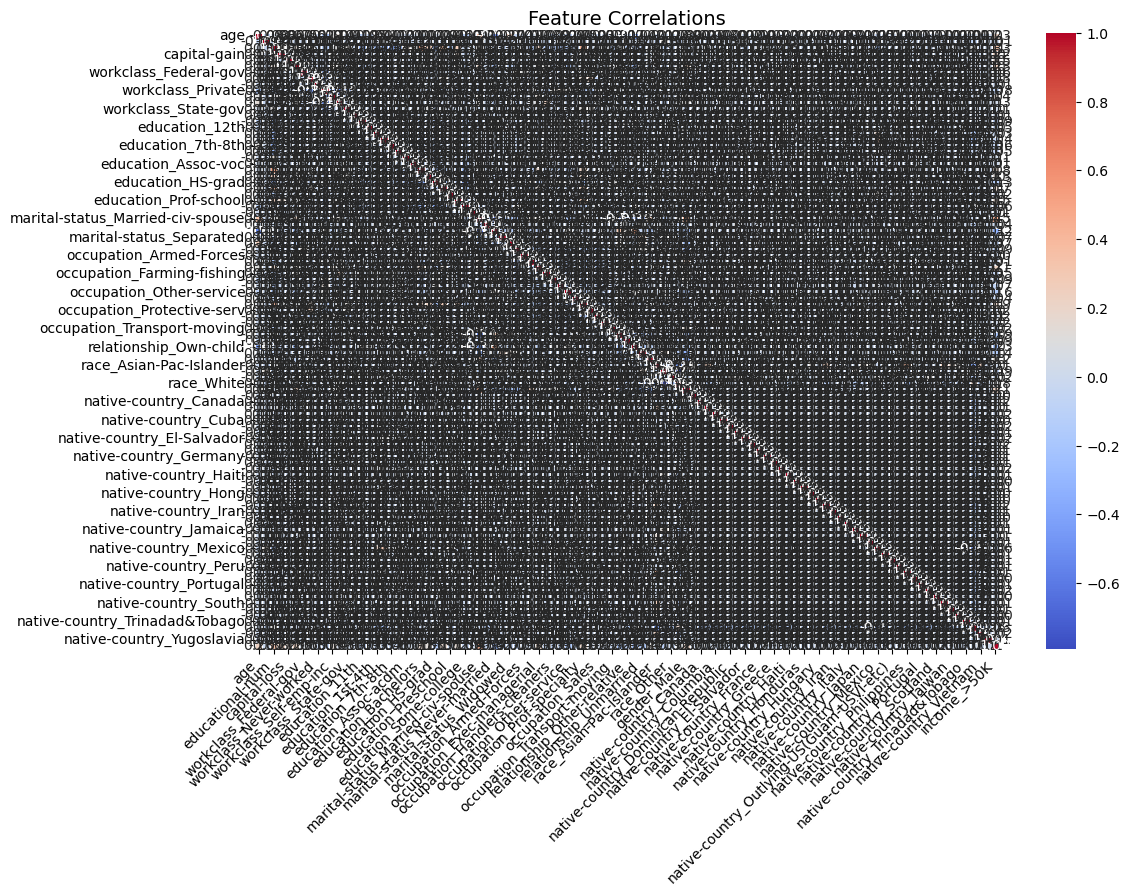

In [25]:

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Print correlation values
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlations", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate for clarity
plt.yticks(fontsize=10)
plt.show()


In [15]:
# Bulid a predictive models
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df_encoded.drop(columns=['income_>50K'])  # Drop target variable
y = df_encoded['income_>50K']  # Binary classification (0 or 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Balances the dataset by generating synthetic samples

In [17]:
# Train Models and compares Performance
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": class_report["macro avg"]["precision"],
        "Recall": class_report["macro avg"]["recall"],
        "F1 Score": class_report["macro avg"]["f1-score"]
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Display results
print(results_df)


C:\Users\asraf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asraf\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:16:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.822397   0.752909  0.766152  0.759016
Random Forest        0.856894   0.802951  0.791105  0.796722
XGBoost              0.868769   0.820220  0.807495  0.813530


In [18]:
# Hyperparameter tuning with Grid SearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Initialize Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 7, 'n_estimators': 200}


This project successfully demonstrated how demographic and employment-related factors influence income levels. Several key insights were uncovered:
1. Higher education levels significantly increase the likelihood of earning more than 50K.
2. Age plays a crucial role, with older individuals generally earning higher incomes.
3. Capital gain is a strong predictor of higher income.
4. SMOTE effectively addressed class imbalance, leading to improved model performance.
5. XGBoost was the best model, achieving the highest accuracy and generalizability.
Next Steps & Future Improvements:
  1.Fairness & Bias Analysis: Investigate whether gender or racial bias exists in income predictions.
  2.Feature Engineering: Explore advanced techniques such as word embeddings for occupation descriptions.
  3.Deep Learning Models: Implement neural networks to further improve classification accuracy.
  4.Explainability: Use SHAP values to understand model decisions and enhance interpretability.